## Example of ``tfcannon`` using with APOGEE DR14 data

``tfcannon`` included training data composed of 5000 high SNR spectra from APOGEE DR14 green detector and $t_\mathrm{eff}$, $\log{g}$, $[\mathrm{Fe/H}]$, $[\mathrm{Mg/H}]$ from ``ASPCAP``. The spectra is continuum normalized with the procedure described in https://ui.adsabs.harvard.edu/abs/2019MNRAS.483.3255L/abstract

In [1]:
## we will now load the data
import tfcannon

import h5py
import numpy as np
from pathlib import Path

p = Path(tfcannon.__file__).parents[1].joinpath('tests/apogee_dr14_test.h5')

h5f = h5py.File(p, 'r')
spec = np.array(h5f["spectra"])
spec_err = np.array(h5f["spectra_error"])
labels = np.array(h5f["teff_logg_feh_mgh"])

print(f"Number of Spectra: {spec.shape[0]}, Each with {spec.shape[1]} pixels")

Number of Spectra: 5000, Each with 2495 pixels


In [2]:
from tfcannon import TFCannon

## then we can train it

model = TFCannon(l1_regularization=1000)
# leave out the first 5 to test later
model.train(spec[5:], spec_err[5:], labels[5:])

W0809 18:40:32.320611  8960 deprecation.py:323] From C:\Users\Henry\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Start Training


100%|██████████████████████████████████████████████████████████████████████████████| 2495/2495 [02:56<00:00, 14.10it/s]


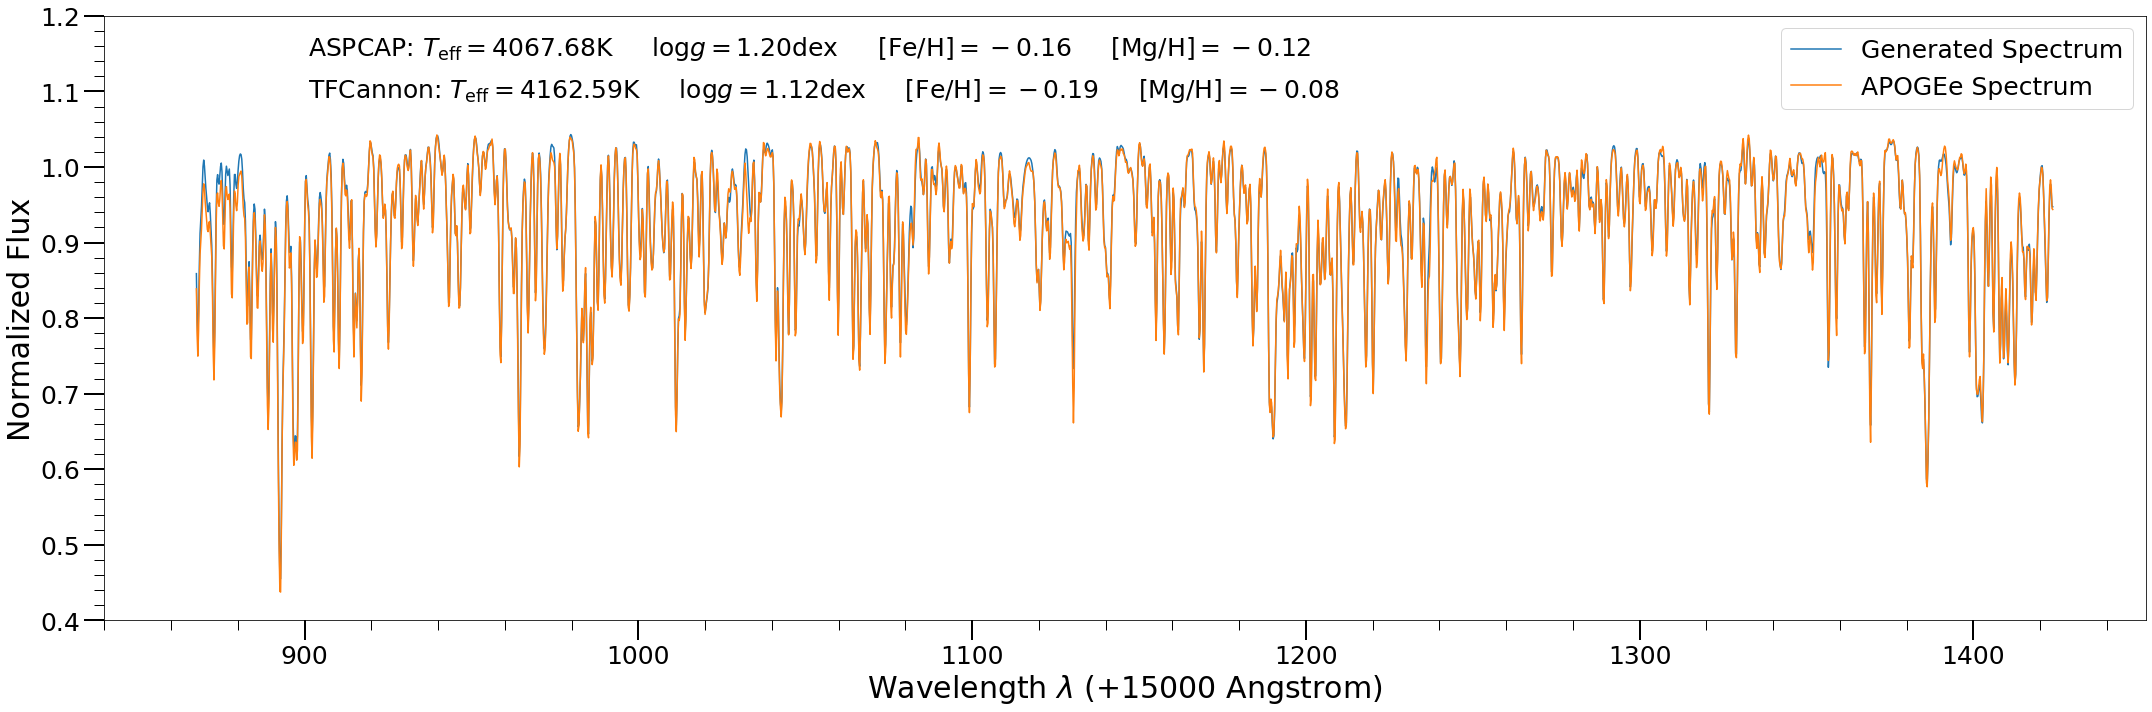

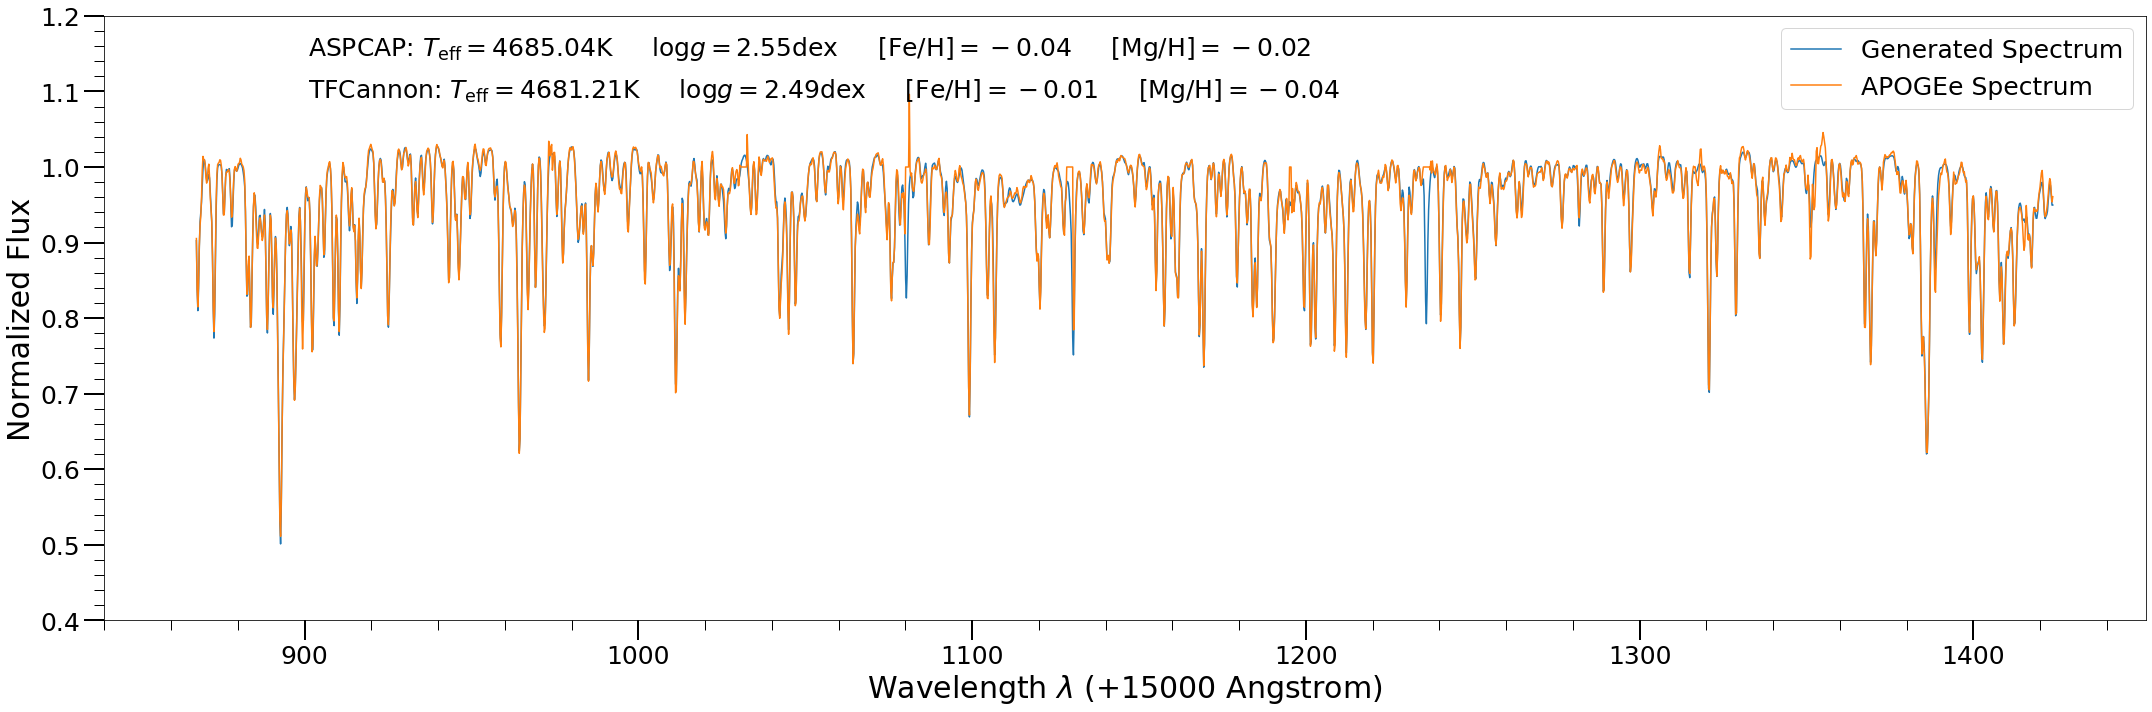

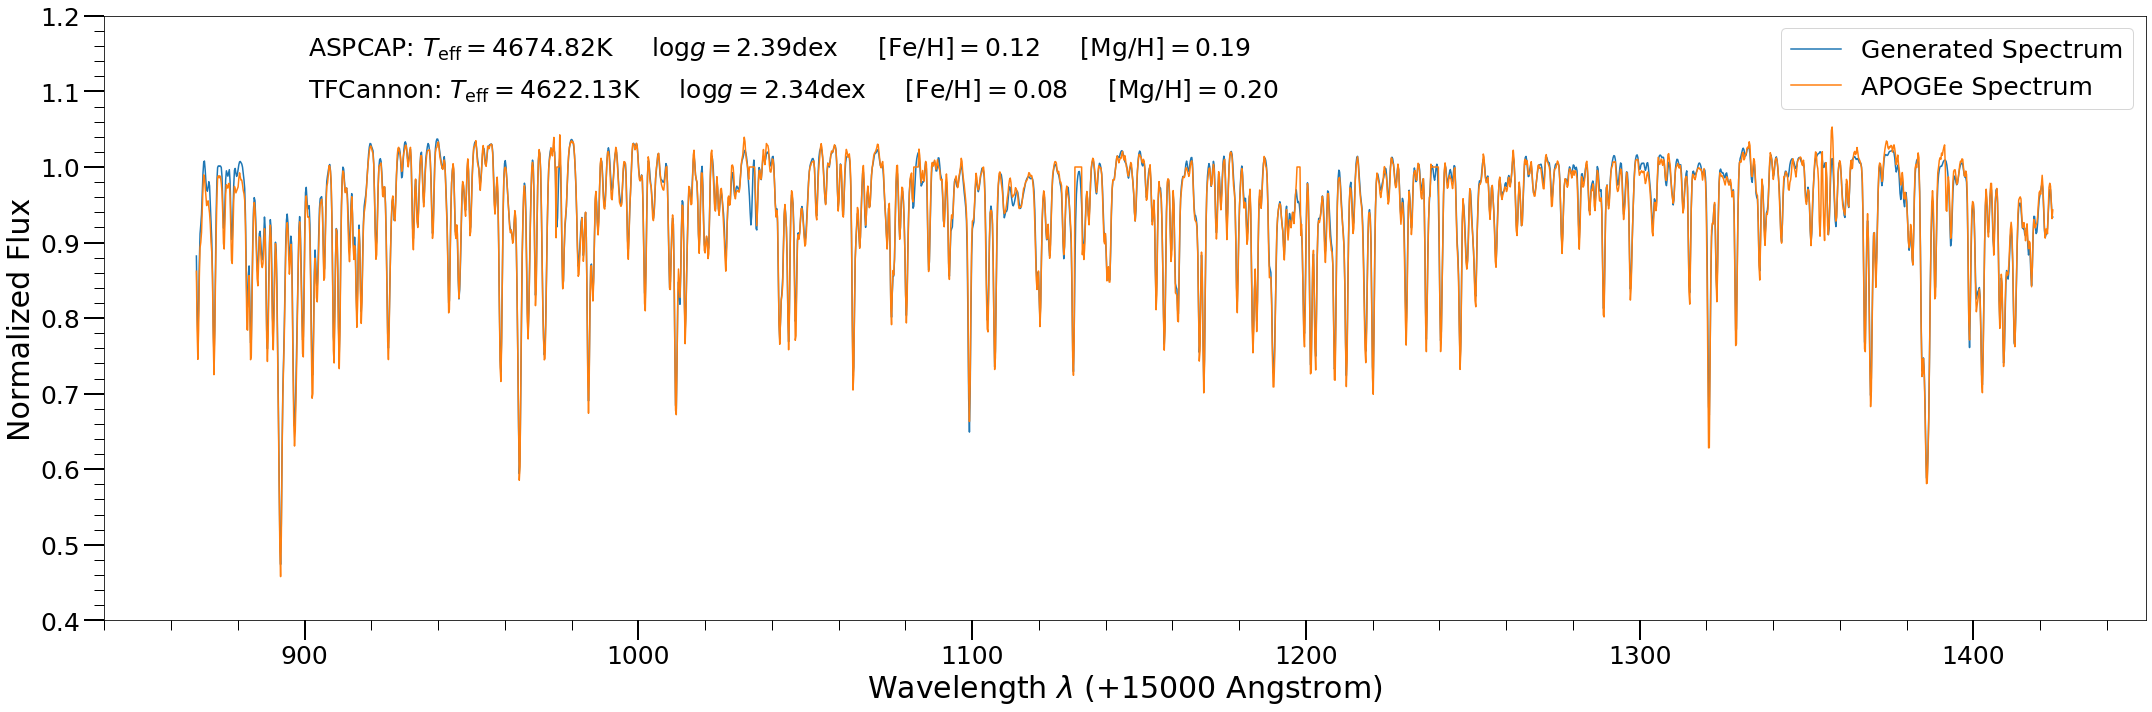

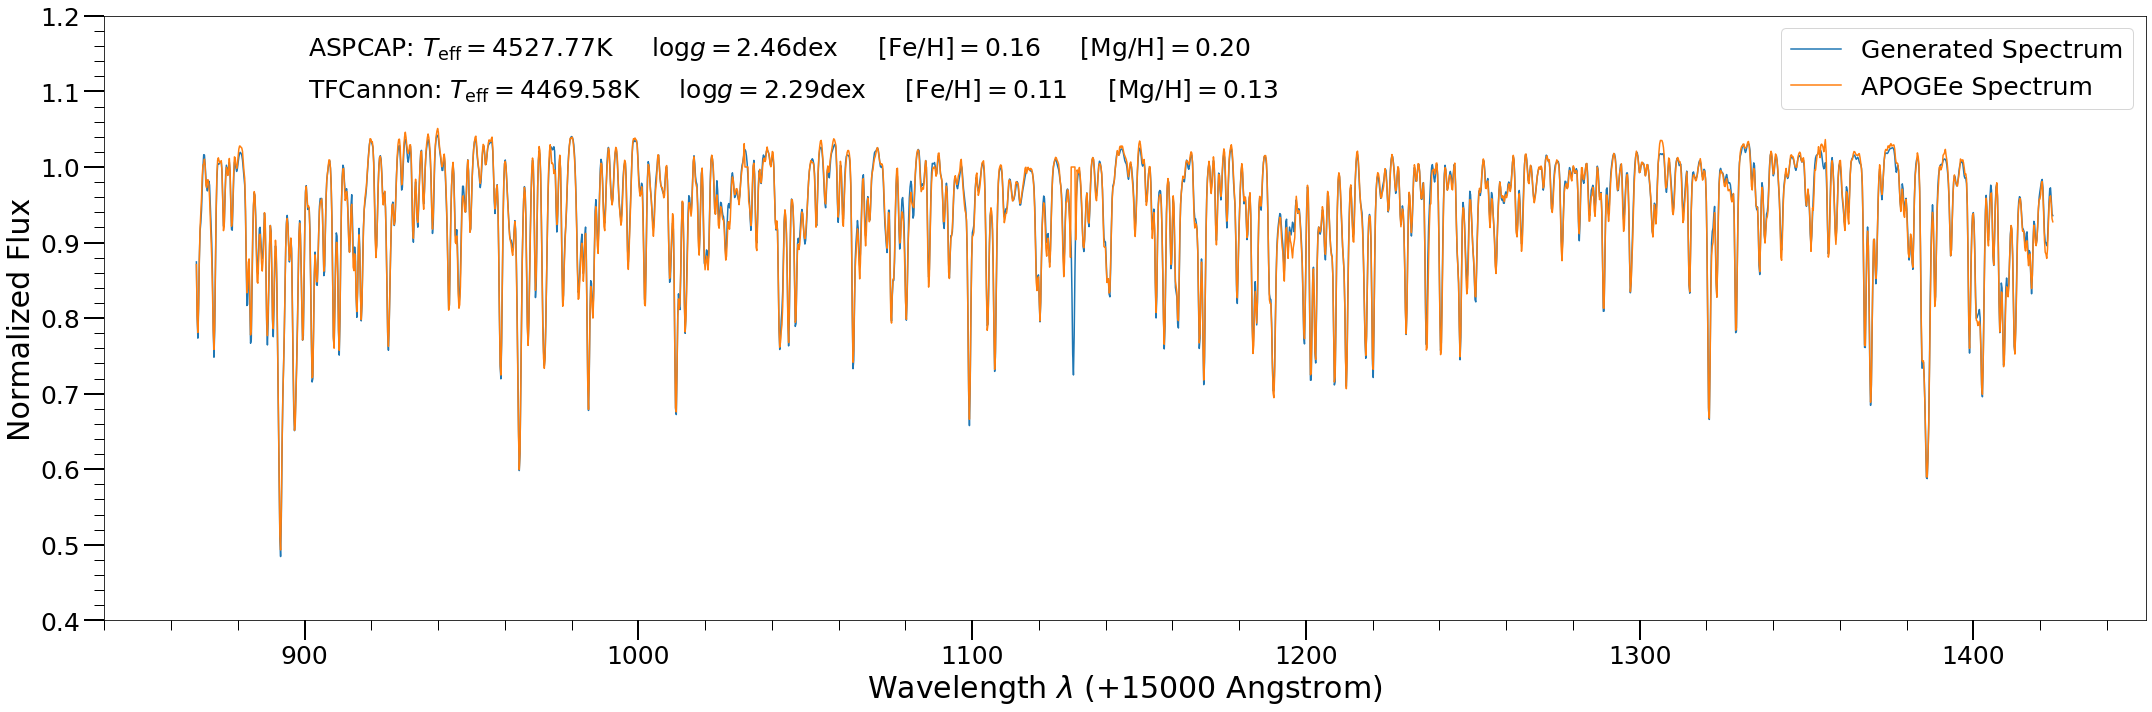

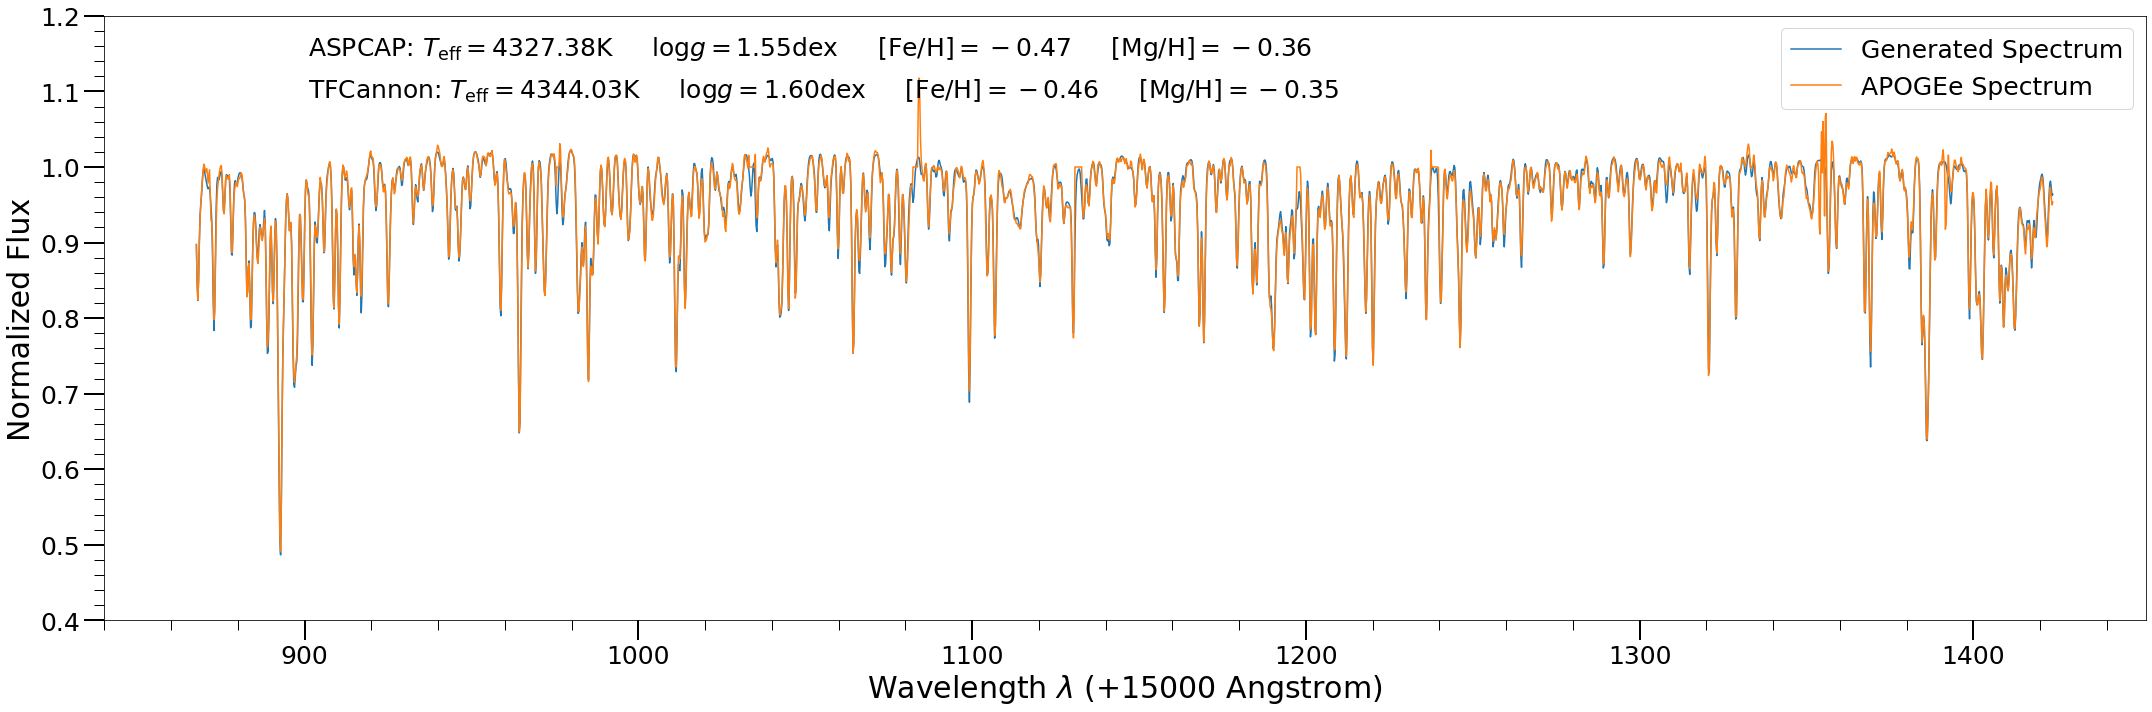

In [3]:
%matplotlib inline
import pylab as plt 

# those spectra excluded from training above
gen_spec = model.generate(labels[0:5])
glabel = model.test(spec[:5], spec_err[:5])

# APOGEE DR14 wavelength solution
apstar_wavegrid = 10. ** np.arange(4.179, 4.179 + 8575 * 6. * 10. ** -6., 6. * 10. ** -6.)
lambda_green = apstar_wavegrid[3585:6080] -15000

for i in range(5):
    plt.figure(figsize=(30,10))
    plt.plot(lambda_green, gen_spec[i], label='Generated Spectrum')
    plt.plot(lambda_green, spec[i], label='APOGEe Spectrum')
    plt.ylim((0.4, 1.2))
    plt.annotate('ASPCAP: ' + r'$T_\mathrm{{eff}}= {:.2f}\mathrm{{K}}$     ' \
                 '$\log{{g}}={:.2f}\mathrm{{dex}}$     ' \
                 '$[\mathrm{{Fe/H}}]={:.2f}$     ' \
                 '$[\mathrm{{Mg/H}}]={:.2f}$'.format(labels[i][0], labels[i][1], labels[i][2], labels[i][3]), 
                 (0.1,0.97), 
                 xycoords='axes fraction',
                 horizontalalignment='left',
                 verticalalignment='top', fontsize=25)
    plt.annotate('TFCannon: ' + r'$T_\mathrm{{eff}}= {:.2f}\mathrm{{K}}$     ' \
                 '$\log{{g}}={:.2f}\mathrm{{dex}}$     ' \
                 '$[\mathrm{{Fe/H}}]={:.2f}$     ' \
                 '$[\mathrm{{Mg/H}}]={:.2f}$'.format(glabel[i][0], glabel[i][1], glabel[i][2], glabel[i][3]), 
                 (0.1,0.90), 
                 xycoords='axes fraction',
                 horizontalalignment='left',
                 verticalalignment='top', fontsize=25)
    plt.xlabel(r'Wavelength $\lambda$ (+15000 Angstrom)', fontsize=30)
    plt.ylabel("Normalized Flux", fontsize=30)
    plt.tick_params(labelsize=25, width=2, length=20, which='major')
    plt.tick_params(width=1, length=10, which='minor')
    plt.minorticks_on()
    plt.legend(loc='upper right', fontsize=25)
    plt.tight_layout()